<a href="https://colab.research.google.com/github/gus-s-ramos/AlgoritmoAtividadeFinal/blob/main/pratica/ae_atv_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codificação por vetor

O código implementa um **Algoritmo Genético (AG)** para resolver o **Problema do Caixeiro Viajante (TSP)**, cujo objetivo é encontrar a rota mais curta que passa por todas as cidades e retorna à origem. Cada cidade é representada por coordenadas no plano e cada indivíduo da população corresponde a uma **ordem de visita** (permutação das cidades). A qualidade de cada rota é avaliada por uma função de **fitness**, definida como o inverso da distância total percorrida, de modo que rotas menores têm valores de fitness maiores.

O processo evolutivo começa com uma **população inicial aleatória** e, a cada geração, aplica operadores genéticos para produzir novas soluções. A **seleção por torneio** escolhe os melhores indivíduos para reprodução, o **crossover (Order Crossover – OX)** combina partes de dois pais mantendo a ordem das cidades, e a **mutação** troca a posição de duas cidades, introduzindo diversidade genética. Esses mecanismos permitem que o algoritmo explore o espaço de soluções em busca de rotas mais curtas.

Após várias gerações, o AG identifica o indivíduo com maior fitness, que representa a **melhor rota encontrada**. O resultado final exibe essa sequência de cidades e sua distância total. Como o processo é estocástico, diferentes execuções podem gerar resultados ligeiramente distintos, refletindo a natureza adaptativa e probabilística dos algoritmos evolutivos.


In [ ]:
import random
import math

# --- Dados do problema ---
cidades = {
    1: (0, 0),
    2: (2, 3),
    3: (5, 4),
    4: (1, 6),
    5: (6, 1)
}

# Distância euclidiana entre duas cidades
def distancia(a, b):
    xa, ya = cidades[a]
    xb, yb = cidades[b]
    return math.sqrt((xa - xb)**2 + (ya - yb)**2)

# Fitness = 1 / (distância total)
def fitness(individuo):
    total = 0
    for i in range(len(individuo) - 1):
        total += distancia(individuo[i], individuo[i + 1])
    total += distancia(individuo[-1], individuo[0])  # volta ao início
    return 1 / total

# Gera indivíduo aleatório
def gerar_individuo():
    ind = list(cidades.keys())
    random.shuffle(ind)
    return ind

# Cruzamento (Order Crossover - OX)
def crossover(pai1, pai2):
    n = len(pai1)
    a, b = sorted(random.sample(range(n), 2))
    filho = [None]*n
    filho[a:b] = pai1[a:b]
    pos = b
    for gene in pai2:
        if gene not in filho:
            if pos >= n:
                pos = 0
            filho[pos] = gene
            pos += 1
    return filho

# Mutação (troca duas cidades de lugar)
def mutacao(ind):
    a, b = random.sample(range(len(ind)), 2)
    ind[a], ind[b] = ind[b], ind[a]

# --- Execução do AG ---
tam_pop = 20
geracoes = 50
taxa_mut = 0.2

# População inicial
pop = [gerar_individuo() for _ in range(tam_pop)]

for g in range(geracoes):
    # Avaliação
    fits = [fitness(ind) for ind in pop]
    nova_pop = []

    # Seleção e reprodução
    for _ in range(tam_pop // 2):
        # Seleção por torneio
        pais = random.sample(pop, 4)
        pai1 = max(pais[:2], key=fitness)
        pai2 = max(pais[2:], key=fitness)

        # Cruzamento
        filho1 = crossover(pai1, pai2)
        filho2 = crossover(pai2, pai1)

        # Mutação
        if random.random() < taxa_mut:
            mutacao(filho1)
        if random.random() < taxa_mut:
            mutacao(filho2)

        nova_pop.extend([filho1, filho2])

    pop = nova_pop

melhor = max(pop, key=fitness)
print("Melhor rota:", melhor)
print("Distância total:", round(1 / fitness(melhor), 2))


Melhor rota: [2, 1, 5, 3, 4]
Distância total: 20.49


# Exercícios

### **Exercício 1 — Mostrar a Evolução da Distância**

> **Objetivo:** visualizar se o algoritmo está convergindo para uma rota melhor.

**Tarefa:**

1. Durante o loop principal (`for g in range(geracoes):`), armazene o **menor valor de distância** de cada geração.
2. Ao final, use o `matplotlib` para **plotar um gráfico** com:

   * eixo x → número da geração
   * eixo y → menor distância encontrada
3. Interprete o comportamento do gráfico: o AG melhora de forma contínua? Há estagnação?

---

### **Exercício 2 — Alterar o Operador de Mutação**

> **Objetivo:** testar outro método de diversificação.

**Tarefa:**
Implemente **mutação por inversão de segmento** (também chamada *swap sequence* ou *reverse mutation*):

* Escolha dois índices aleatórios `i` e `j`.
* Inverta a ordem das cidades nesse intervalo (`ind[i:j] = reversed(ind[i:j])`).
  Compare o desempenho com o método atual (troca simples de duas cidades).

---

### **Exercício 3 — Adicionar Elitismo**

> **Objetivo:** evitar perder a melhor solução entre gerações.

**Tarefa:**
Modifique o código para **preservar automaticamente o melhor indivíduo** de cada geração.
Dica:

* Antes de gerar a nova população, guarde o melhor da população atual.
* Substitua o pior indivíduo da nova geração por ele.

Verifique se o elitismo melhora os resultados finais.

---

### **Exercício 4 — Aumentar o Número de Cidades**

> **Objetivo:** testar o comportamento do AG em instâncias maiores.

**Tarefa:**

1. Gere automaticamente **10 cidades** com coordenadas aleatórias no plano (por exemplo, `random.uniform(0, 10)` para x e y).
2. Ajuste o código para trabalhar com o novo conjunto.
3. Execute o AG com diferentes números de gerações (ex: 50, 100, 200).
4. Observe se o tempo de execução e a qualidade das rotas mudam significativamente.




## Exercício 1:

Melhor rota: [1, 5, 3, 4, 2]
Distância total: 20.49


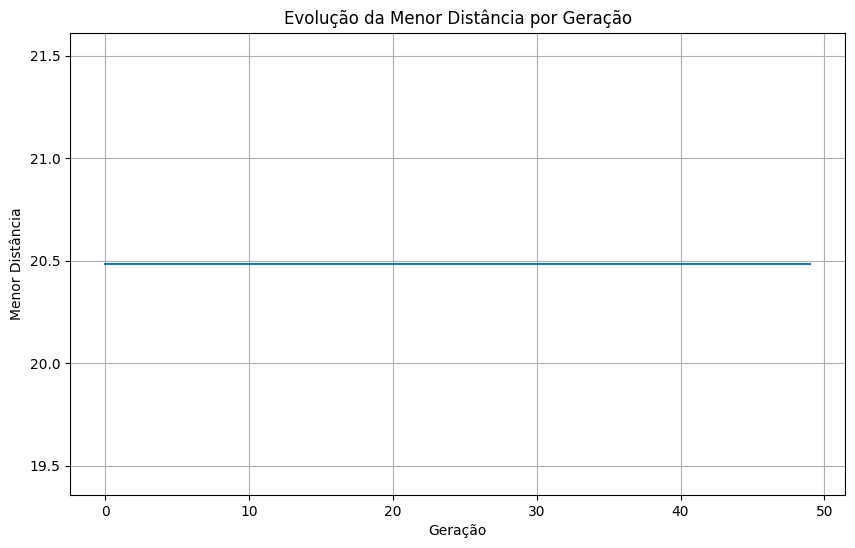

In [2]:
import random
import math
import matplotlib.pyplot as plt

# --- Dados do problema ---
cidades = {
    1: (0, 0),
    2: (2, 3),
    3: (5, 4),
    4: (1, 6),
    5: (6, 1)
}

# Distância euclidiana entre duas cidades
def distancia(a, b):
    xa, ya = cidades[a]
    xb, yb = cidades[b]
    return math.sqrt((xa - xb)**2 + (ya - yb)**2)

# Fitness = 1 / (distância total)
def fitness(individuo):
    total = 0
    for i in range(len(individuo) - 1):
        total += distancia(individuo[i], individuo[i + 1])
    total += distancia(individuo[-1], individuo[0])  # volta ao início
    return 1 / total

# Gera indivíduo aleatório
def gerar_individuo():
    ind = list(cidades.keys())
    random.shuffle(ind)
    return ind

# Cruzamento (Order Crossover - OX)
def crossover(pai1, pai2):
    n = len(pai1)
    a, b = sorted(random.sample(range(n), 2))
    filho = [None]*n
    filho[a:b] = pai1[a:b]
    pos = b
    for gene in pai2:
        if gene not in filho:
            if pos >= n:
                pos = 0
            filho[pos] = gene
            pos += 1
    return filho

# Mutação (troca duas cidades de lugar)
def mutacao(ind):
    a, b = random.sample(range(len(ind)), 2)
    ind[a], ind[b] = ind[b], ind[a]

# --- Execução do AG ---
tam_pop = 20
geracoes = 50
taxa_mut = 0.2

# População inicial
pop = [gerar_individuo() for _ in range(tam_pop)]

# Lista para armazenar a menor distância de cada geração
menores_distancias = []

for g in range(geracoes):
    # Avaliação
    fits = [fitness(ind) for ind in pop]
    nova_pop = []

    # Encontra o melhor indivíduo da geração atual
    melhor_fitness_geracao = max(fits)
    menor_distancia_geracao = 1 / melhor_fitness_geracao
    menores_distancias.append(menor_distancia_geracao)

    # Seleção e reprodução
    for _ in range(tam_pop // 2):
        # Seleção por torneio
        pais = random.sample(pop, 4)
        pai1 = max(pais[:2], key=fitness)
        pai2 = max(pais[2:], key=fitness)

        # Cruzamento
        filho1 = crossover(pai1, pai2)
        filho2 = crossover(pai2, pai1)

        # Mutação
        if random.random() < taxa_mut:
            mutacao(filho1)
        if random.random() < taxa_mut:
            mutacao(filho2)

        nova_pop.extend([filho1, filho2])

    pop = nova_pop

melhor = max(pop, key=fitness)
print("Melhor rota:", melhor)
print("Distância total:", round(1 / fitness(melhor), 2))

# Plotar a evolução da menor distância
plt.figure(figsize=(10, 6))
plt.plot(range(geracoes), menores_distancias)
plt.xlabel("Geração")
plt.ylabel("Menor Distância")
plt.title("Evolução da Menor Distância por Geração")
plt.grid(True)
plt.show()

## Exercício 2:


Melhor rota: [5, 1, 2, 4, 3]
Distância total: 20.49


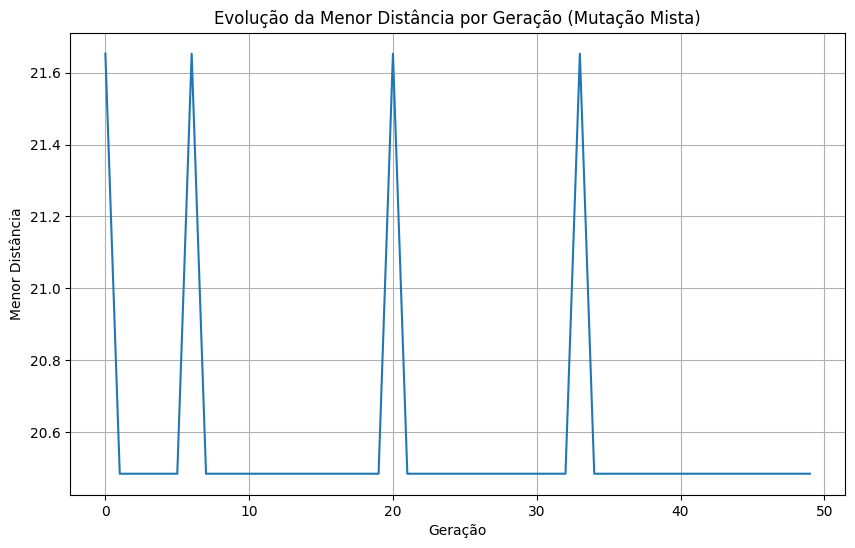

In [3]:
import random
import math
import matplotlib.pyplot as plt

# --- Dados do problema ---
cidades = {
    1: (0, 0),
    2: (2, 3),
    3: (5, 4),
    4: (1, 6),
    5: (6, 1)
}

# Distância euclidiana entre duas cidades
def distancia(a, b):
    xa, ya = cidades[a]
    xb, yb = cidades[b]
    return math.sqrt((xa - xb)**2 + (ya - yb)**2)

# Fitness = 1 / (distância total)
def fitness(individuo):
    total = 0
    for i in range(len(individuo) - 1):
        total += distancia(individuo[i], individuo[i + 1])
    total += distancia(individuo[-1], individuo[0])  # volta ao início
    return 1 / total

# Gera indivíduo aleatório
def gerar_individuo():
    ind = list(cidades.keys())
    random.shuffle(ind)
    return ind

# Cruzamento (Order Crossover - OX)
def crossover(pai1, pai2):
    n = len(pai1)
    a, b = sorted(random.sample(range(n), 2))
    filho = [None]*n
    filho[a:b] = pai1[a:b]
    pos = b
    for gene in pai2:
        if gene not in filho:
            if pos >= n:
                pos = 0
            filho[pos] = gene
            pos += 1
    return filho

# Mutação (troca duas cidades de lugar)
def mutacao(ind):
    a, b = random.sample(range(len(ind)), 2)
    ind[a], ind[b] = ind[b], ind[a]

# Mutação por inversão de segmento
def mutacao_inversao(ind):
    n = len(ind)
    i, j = sorted(random.sample(range(n), 2))
    ind[i:j+1] = reversed(ind[i:j+1])


# --- Execução do AG ---
tam_pop = 20
geracoes = 50
taxa_mut = 0.2
prob_mut_inversao = 0.5  # Probabilidade de usar mutação por inversão

# População inicial
pop = [gerar_individuo() for _ in range(tam_pop)]

# Lista para armazenar a menor distância de cada geração
menores_distancias = []

for g in range(geracoes):
    # Avaliação
    fits = [fitness(ind) for ind in pop]
    nova_pop = []

    # Encontra o melhor indivíduo da geração atual
    melhor_fitness_geracao = max(fits)
    menor_distancia_geracao = 1 / melhor_fitness_geracao
    menores_distancias.append(menor_distancia_geracao)

    # Seleção e reprodução
    for _ in range(tam_pop // 2):
        # Seleção por torneio
        pais = random.sample(pop, 4)
        pai1 = max(pais[:2], key=fitness)
        pai2 = max(pais[2:], key=fitness)

        # Cruzamento
        filho1 = crossover(pai1, pai2)
        filho2 = crossover(pai2, pai1)

        # Mutação
        if random.random() < taxa_mut:
            if random.random() < prob_mut_inversao:
                mutacao_inversao(filho1)
            else:
                mutacao(filho1)
        if random.random() < taxa_mut:
            if random.random() < prob_mut_inversao:
                mutacao_inversao(filho2)
            else:
                mutacao(filho2)


        nova_pop.extend([filho1, filho2])

    pop = nova_pop

melhor = max(pop, key=fitness)
print("Melhor rota:", melhor)
print("Distância total:", round(1 / fitness(melhor), 2))

# Plotar a evolução da menor distância
plt.figure(figsize=(10, 6))
plt.plot(range(geracoes), menores_distancias)
plt.xlabel("Geração")
plt.ylabel("Menor Distância")
plt.title("Evolução da Menor Distância por Geração (Mutação Mista)")
plt.grid(True)
plt.show()

## Exercício 3


Melhor rota: [3, 5, 1, 2, 4]
Distância total: 20.49


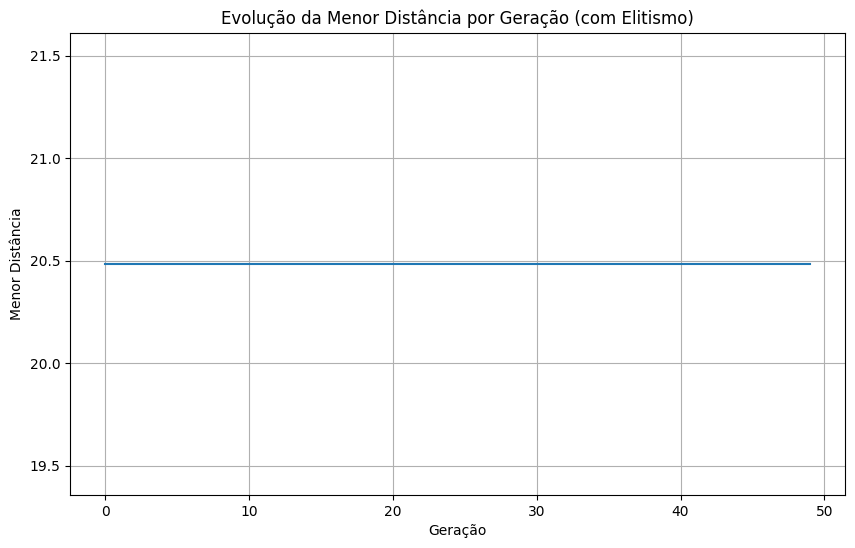

In [4]:
import random
import math
import matplotlib.pyplot as plt

# --- Dados do problema ---
cidades = {
    1: (0, 0),
    2: (2, 3),
    3: (5, 4),
    4: (1, 6),
    5: (6, 1)
}

# Distância euclidiana entre duas cidades
def distancia(a, b):
    xa, ya = cidades[a]
    xb, yb = cidades[b]
    return math.sqrt((xa - xb)**2 + (ya - yb)**2)

# Fitness = 1 / (distância total)
def fitness(individuo):
    total = 0
    for i in range(len(individuo) - 1):
        total += distancia(individuo[i], individuo[i + 1])
    total += distancia(individuo[-1], individuo[0])  # volta ao início
    return 1 / total

# Gera indivíduo aleatório
def gerar_individuo():
    ind = list(cidades.keys())
    random.shuffle(ind)
    return ind

# Cruzamento (Order Crossover - OX)
def crossover(pai1, pai2):
    n = len(pai1)
    a, b = sorted(random.sample(range(n), 2))
    filho = [None]*n
    filho[a:b] = pai1[a:b]
    pos = b
    for gene in pai2:
        if gene not in filho:
            if pos >= n:
                pos = 0
            filho[pos] = gene
            pos += 1
    return filho

# Mutação (troca duas cidades de lugar)
def mutacao(ind):
    a, b = random.sample(range(len(ind)), 2)
    ind[a], ind[b] = ind[b], ind[a]

# Mutação por inversão de segmento
def mutacao_inversao(ind):
    n = len(ind)
    i, j = sorted(random.sample(range(n), 2))
    ind[i:j+1] = reversed(ind[i:j+1])


# --- Execução do AG ---
tam_pop = 20
geracoes = 50
taxa_mut = 0.2
prob_mut_inversao = 0.5  # Probabilidade de usar mutação por inversão

# População inicial
pop = [gerar_individuo() for _ in range(tam_pop)]

# Lista para armazenar a menor distância de cada geração
menores_distancias = []

for g in range(geracoes):
    # Avaliação
    fits = [fitness(ind) for ind in pop]
    nova_pop = []

    # Encontra o melhor indivíduo da geração atual e sua distância
    melhor_fitness_geracao = max(fits)
    melhor_individuo_geracao_atual = pop[fits.index(melhor_fitness_geracao)]
    menor_distancia_geracao = 1 / melhor_fitness_geracao
    menores_distancias.append(menor_distancia_geracao)


    # Seleção e reprodução
    for _ in range(tam_pop // 2):
        # Seleção por torneio
        pais = random.sample(pop, 4)
        pai1 = max(pais[:2], key=fitness)
        pai2 = max(pais[2:], key=fitness)

        # Cruzamento
        filho1 = crossover(pai1, pai2)
        filho2 = crossover(pai2, pai1)

        # Mutação
        if random.random() < taxa_mut:
            if random.random() < prob_mut_inversao:
                mutacao_inversao(filho1)
            else:
                mutacao(filho1)
        if random.random() < taxa_mut:
            if random.random() < prob_mut_inversao:
                mutacao_inversao(filho2)
            else:
                mutacao(filho2)


        nova_pop.extend([filho1, filho2])

    # Implementação do Elitismo
    fits_nova_pop = [fitness(ind) for ind in nova_pop]
    pior_fitness_nova_pop = min(fits_nova_pop)
    indice_pior_individuo = fits_nova_pop.index(pior_fitness_nova_pop)
    nova_pop[indice_pior_individuo] = melhor_individuo_geracao_atual

    pop = nova_pop

melhor = max(pop, key=fitness)
print("Melhor rota:", melhor)
print("Distância total:", round(1 / fitness(melhor), 2))

# Plotar a evolução da menor distância
plt.figure(figsize=(10, 6))
plt.plot(range(geracoes), menores_distancias)
plt.xlabel("Geração")
plt.ylabel("Menor Distância")
plt.title("Evolução da Menor Distância por Geração (com Elitismo)")
plt.grid(True)
plt.show()

## Exercício 4


Executando AG com 50 gerações:
Melhor rota: [8, 5, 3, 1, 9, 7, 2, 6, 4, 10]
Distância total: 27.06


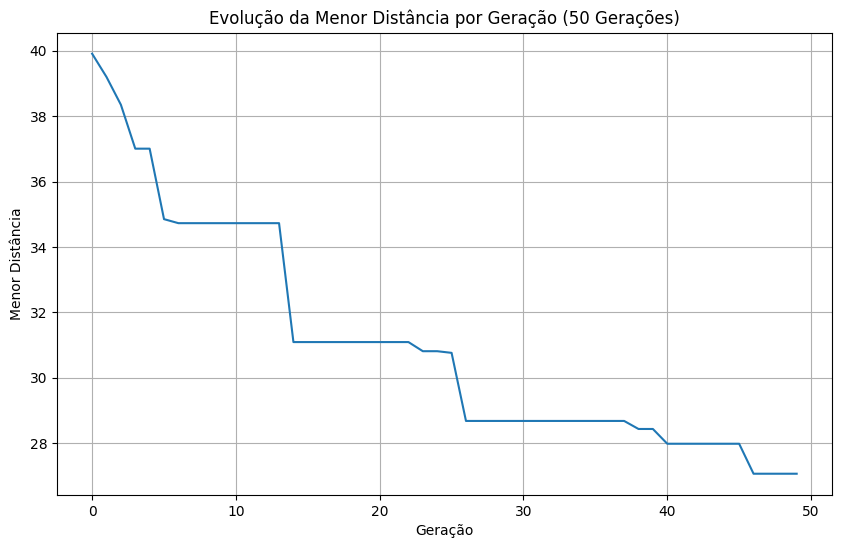

Executando AG com 100 gerações:
Melhor rota: [10, 4, 6, 2, 7, 9, 1, 5, 3, 8]
Distância total: 26.62


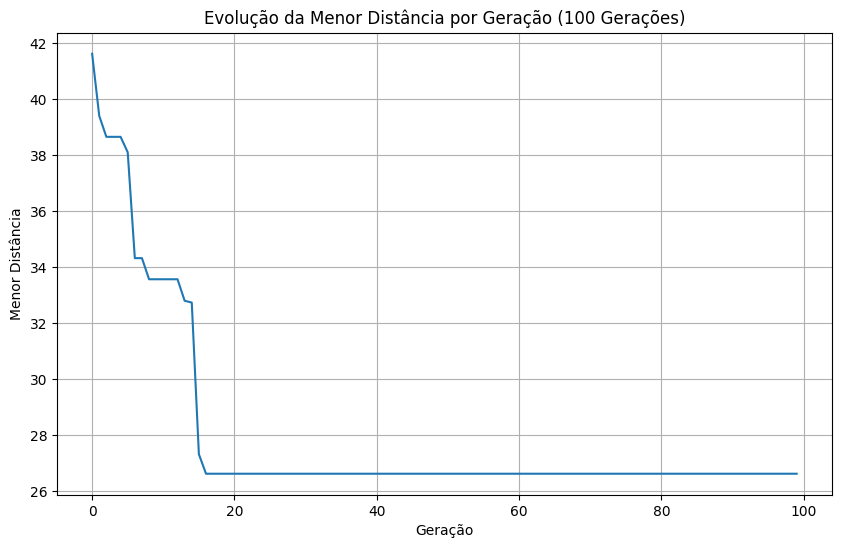

Executando AG com 200 gerações:
Melhor rota: [9, 1, 5, 3, 8, 10, 4, 6, 2, 7]
Distância total: 26.62


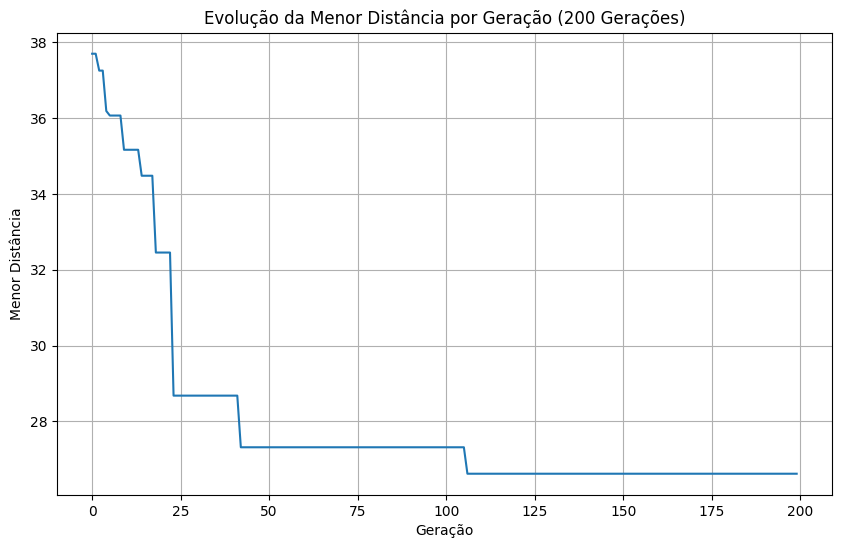

In [5]:
import random
import math
import matplotlib.pyplot as plt

# --- Dados do problema ---
# Gerar 10 cidades com coordenadas aleatórias
num_cidades = 10
cidades = {i + 1: (random.uniform(0, 10), random.uniform(0, 10)) for i in range(num_cidades)}

# Distância euclidiana entre duas cidades
def distancia(a, b):
    xa, ya = cidades[a]
    xb, yb = cidades[b]
    return math.sqrt((xa - xb)**2 + (ya - yb)**2)

# Fitness = 1 / (distância total)
def fitness(individuo):
    total = 0
    for i in range(len(individuo) - 1):
        total += distancia(individuo[i], individuo[i + 1])
    total += distancia(individuo[-1], individuo[0])  # volta ao início
    return 1 / total

# Gera indivíduo aleatório
def gerar_individuo():
    ind = list(cidades.keys())
    random.shuffle(ind)
    return ind

# Cruzamento (Order Crossover - OX)
def crossover(pai1, pai2):
    n = len(pai1)
    a, b = sorted(random.sample(range(n), 2))
    filho = [None]*n
    filho[a:b] = pai1[a:b]
    pos = b
    for gene in pai2:
        if gene not in filho:
            if pos >= n:
                pos = 0
            filho[pos] = gene
            pos += 1
    return filho

# Mutação (troca duas cidades de lugar)
def mutacao(ind):
    a, b = random.sample(range(len(ind)), 2)
    ind[a], ind[b] = ind[b], ind[a]

# Mutação por inversão de segmento
def mutacao_inversao(ind):
    n = len(ind)
    i, j = sorted(random.sample(range(n), 2))
    ind[i:j+1] = reversed(ind[i:j+1])

# --- Execução do AG ---
tam_pop = 20
taxa_mut = 0.2
prob_mut_inversao = 0.5

geracoes_list = [50, 100, 200]

for geracoes in geracoes_list:
    print(f"Executando AG com {geracoes} gerações:")

    # População inicial
    pop = [gerar_individuo() for _ in range(tam_pop)]

    # Lista para armazenar a menor distância de cada geração
    menores_distancias = []

    for g in range(geracoes):
        # Avaliação
        fits = [fitness(ind) for ind in pop]
        nova_pop = []

        # Encontra o melhor indivíduo da geração atual e sua distância
        melhor_fitness_geracao = max(fits)
        melhor_individuo_geracao_atual = pop[fits.index(melhor_fitness_geracao)]
        menor_distancia_geracao = 1 / melhor_fitness_geracao
        menores_distancias.append(menor_distancia_geracao)

        # Seleção e reprodução
        for _ in range(tam_pop // 2):
            # Seleção por torneio
            pais = random.sample(pop, 4)
            pai1 = max(pais[:2], key=fitness)
            pai2 = max(pais[2:], key=fitness)

            # Cruzamento
            filho1 = crossover(pai1, pai2)
            filho2 = crossover(pai2, pai1)

            # Mutação
            if random.random() < taxa_mut:
                if random.random() < prob_mut_inversao:
                    mutacao_inversao(filho1)
                else:
                    mutacao(filho1)
            if random.random() < taxa_mut:
                if random.random() < prob_mut_inversao:
                    mutacao_inversao(filho2)
                else:
                    mutacao(filho2)

            nova_pop.extend([filho1, filho2])

        # Implementação do Elitismo
        fits_nova_pop = [fitness(ind) for ind in nova_pop]
        pior_fitness_nova_pop = min(fits_nova_pop)
        indice_pior_individuo = fits_nova_pop.index(pior_fitness_nova_pop)
        nova_pop[indice_pior_individuo] = melhor_individuo_geracao_atual

        pop = nova_pop

    melhor = max(pop, key=fitness)
    print("Melhor rota:", melhor)
    print("Distância total:", round(1 / fitness(melhor), 2))

    # Plotar a evolução da menor distância
    plt.figure(figsize=(10, 6))
    plt.plot(range(geracoes), menores_distancias)
    plt.xlabel("Geração")
    plt.ylabel("Menor Distância")
    plt.title(f"Evolução da Menor Distância por Geração ({geracoes} Gerações)")
    plt.grid(True)
    plt.show()